In [163]:
import numpy as np
import pandas as pd

data = pd.read_csv("AG_NO3_fill_cells_remove_NAN.csv", nrows=15808)
datanp = np.asarray(data)
datanp


# for x in datanp:
#     if(x[2] == 1):
#         print(x)

array([['8/2/2016 12:29', 0.071, 0],
       ['8/2/2016 12:59', 0.03, 0],
       ['8/2/2016 13:29', 0.03, 0],
       ...,
       ['6/28/2017 23:59', 1.286, 0],
       ['6/29/2017 0:29', 1.288, 0],
       ['6/29/2017 0:59', 1.278, 0]], dtype=object)

In [164]:
window_size = 6
window_step_size = 1
threshold_percentage = 95
initial_threshold_value = 10.5
total_extreme_cases = 77
anomaly_events = []
anomaly_event_cnt = 0

total_rows = len(datanp)
total_rows

new_threshold_value = initial_threshold_value

for window_batch_start_index in range(0, total_rows - window_size + 1, window_step_size):
    window_batch_data = datanp[window_batch_start_index:window_batch_start_index + window_size]
#     print(window_batch_data)
    window_batch_data_nitrate =  window_batch_data[:,1]
#     print(window_batch_data_nitrate)

    value_of_threshold_percentage =  np.percentile(window_batch_data_nitrate, threshold_percentage)
    #     print(value_of_threshold_percentage)
    
    if(value_of_threshold_percentage > new_threshold_value):        
#         print(value_of_threshold_percentage)        
#         new_threshold_value = value_of_threshold_percentage
        for batch_index in range(0, window_size):            
            if(window_batch_data_nitrate[batch_index] > new_threshold_value):
#                 print("index: " + str(window_batch_start_index + batch_index))
                anomaly_events.append(window_batch_start_index + batch_index)
                datanp[window_batch_start_index + batch_index,2] = 2
#     elif(value_of_threshold_percentage < initial_threshold_value):
#         new_threshold_value = initial_threshold_value
#     else:
#         new_threshold_value = value_of_threshold_percentage
        
anomaly_events_uni = list(set(anomaly_events))   
anomaly_event_cnt =  len(anomaly_events_uni)
print("anomaly_event_cnt")
print(anomaly_event_cnt)
# print("anomaly_events")
# print(anomaly_events_uni)

datanp[datanp[:, 2] == 2, :]



# Calculate your normal event detection accuracy rate (i.e., correct normal detection cases/total normal cases) 
# and anomaly event detection accuracy rate (i.e., correct anomaly detection cases/total extreme cases)

normaleventdetectionaccuracyrate = ((total_rows - anomaly_event_cnt) / total_rows) * 100
anomalyeventdetectionaccuracyrate = (anomaly_event_cnt/total_extreme_cases) * 100

print("normal event detection accuracyrate")
print(normaleventdetectionaccuracyrate)
print("anomaly event detection accuracyrate")
print(anomalyeventdetectionaccuracyrate)

anomaly_event_cnt
77
normal event detection accuracyrate
99.5129048582996
anomaly event detection accuracyrate
100.0


In [165]:
datanp_updated = datanp[datanp[:, 2] == 2, :]

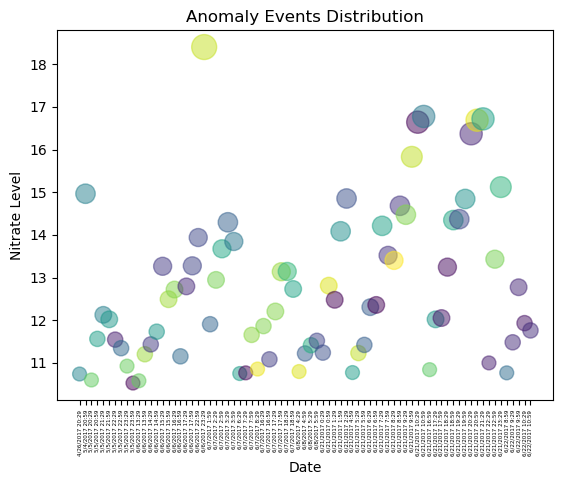

In [183]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

datanp_updated = datanp[datanp[:, 2] == 2, :]

N = len(datanp_updated)
x = datanp_updated[:,0]
y = datanp_updated[:,1]
inty = y.astype(int)
colors = np.random.rand(N)
area = inty ** 2

xlabels = [dte for dte in x]
plt.xticks(ticks=range(len(inty)), labels=xlabels, rotation=90, fontsize=4)
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title("Anomaly Events Distribution")
plt.xlabel("Date")
plt.ylabel("Nitrate Level")
plt.show()


